# **Computational Methods**
## **Interpolation**

Written by Niv Keren, nivkeren1@mail.tau.ac.il 

*Computational Methods* class: 0341-2300

2020/Semester I; Tuesdays 14:00-16:00

FACULTY OF EXACT SCIENCES | GEOPHYSICS & PLANETARY SCIENCES  
Tel Aviv University

---
## **SciPy**
a Python library used for scientific computing and technical computing.  
SciPy contains modules for *optimization, linear algebra, integration, interpolation, special functions, FFT,  
signal and image processing, ODE solvers and other* tasks common in science and engineering.

SciPy builds on the NumPy array object and is part of the NumPy stack which includes tools like Matplotlib,  
pandas and SymPy, and an expanding set of scientific computing libraries. [(from wikipedia)](https://en.wikipedia.org/wiki/SciPy)

---
to refresh your memory about interpolation maybe you'd like to browse this wikipedia entry: [(from wikipedia)](https://en.wikipedia.org/wiki/Interpolation)

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [15, 6.67]

 
Python's function `interp` receives as input x and y values of functions at certain locations,  
and it interpolates them to get the values in other locations that are specified.   
Methods of interpolation go from *nearest neighbor*, through *linear interpolation* to *cubic interpolation*.
 

In [2]:
from scipy.interpolate import interp1d

Let's calulate the sine function at 60 points between
0 and 2*pi.

In [3]:
x1 = np.linspace(0, 2 * np.pi, 60);

Let's also sample this function at a much coarser
sampling - **only six points** on the same interval.

In [4]:
x2 = np.linspace(0, 2 * np.pi, 6);

First, let's see the nice plot, of the fine sampling.

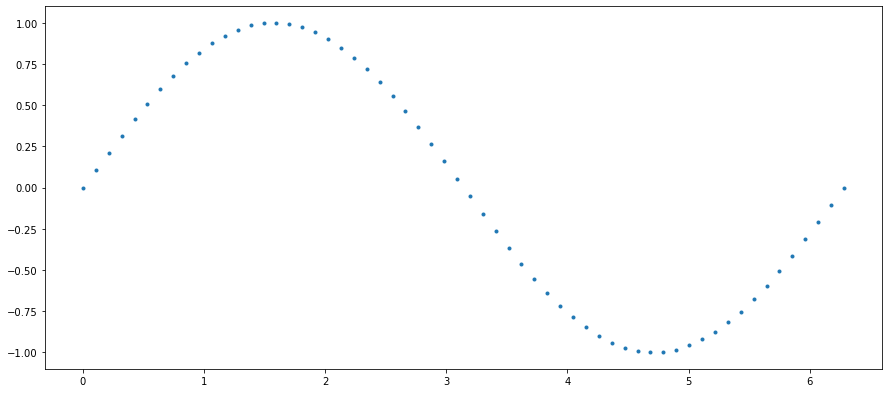

In [8]:
plt.plot(x1, np.sin(x1), '.')
plt.show()

Now let's see the coarse sampling. The function 'plot'
simply connects the points with straight lines.

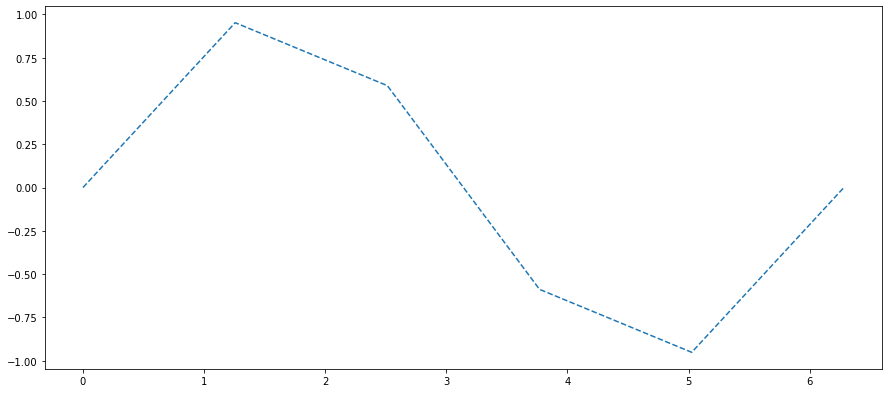

In [9]:
plt.plot(x2, np.sin(x2), '--')
plt.show()

### **Now let's interpolate.**
The function `interp1d()` gets the available points (here, the six points)
and then the new x points where the function should be interpolated.  
By default the interpolation method is **linear**, i.e., straight lines simply connect
the points.

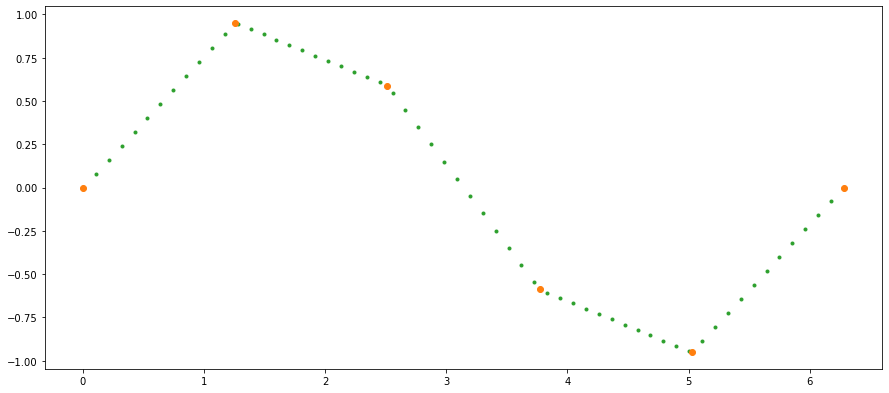

In [11]:
f1 = interp1d(x=x2, y=np.sin(x2), kind='linear')
z1 = f1(x1)
plt.plot(x1, z1, 'C2.')
plt.plot(x2, np.sin(x2), 'C1o')
plt.show()

**Nearest neighbor** - interpolation simply takes the
value of the nearest point (along x diretion).

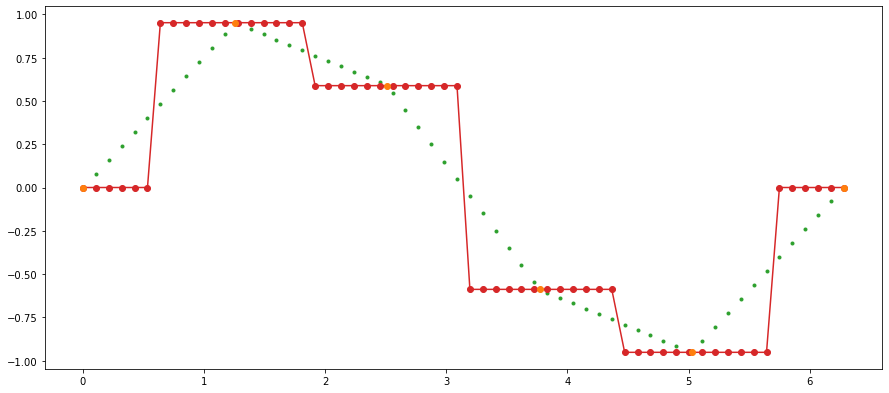

In [12]:
f2 = interp1d(x=x2, y=np.sin(x2), kind='nearest')
z2 = f2(x1)
plt.plot(x1, z1, 'C2.')
plt.plot(x1, z2, 'C3o-')
plt.plot(x2, np.sin(x2), 'C1o')
plt.show()

**Spline interpolation** connects the points with polynomials so that both the function and its
derivatives are continuous.  
It's very good for very well-behaved, smooth functions.

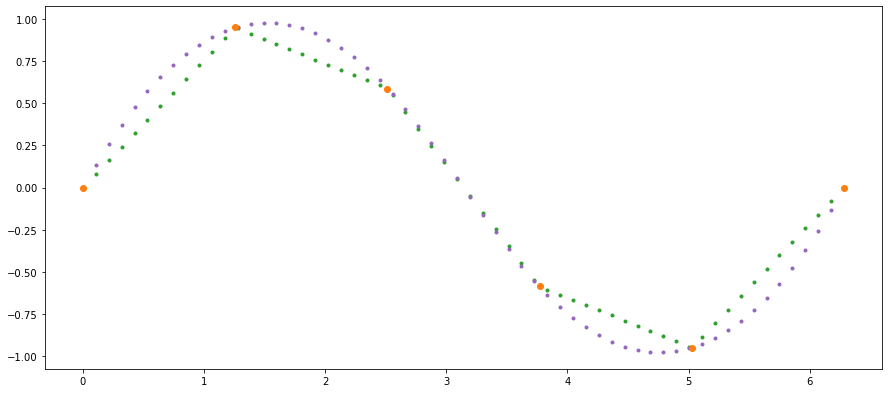

In [13]:
f3 = interp1d(x=x2, y=np.sin(x2), kind='cubic')
z3 = f3(x1)
plt.plot(x1, z1, 'C2.')
plt.plot(x1, z3, 'C4.')
plt.plot(x2, np.sin(x2), 'C1o')
plt.show()

**Another example for interpolation**  
The human hearing threshold as a function of the frequency.  
The arrays *hz.npy* and *sql.hz* (attached) defines the minimum sound pressure level that the human ear is sensitive to.  
* Hz - frequencies (in Hertz)
* spl - minimal sound pressure level.

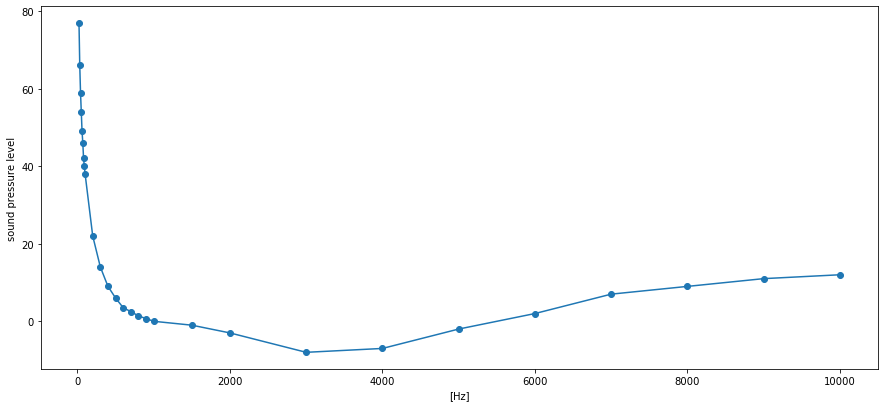

In [14]:
hz = np.load("files/hz.npy")
spl = np.load("files/spl.npy")

plt.plot(hz, spl, 'o-')
plt.xlabel('[Hz]')
plt.ylabel('sound pressure level')
plt.show()

Because of the nature of the x-axis data, it is better to use logarithmic scale only on this axis.  
This is obtained by plotting with `semilogx` instead of 'plot'. 

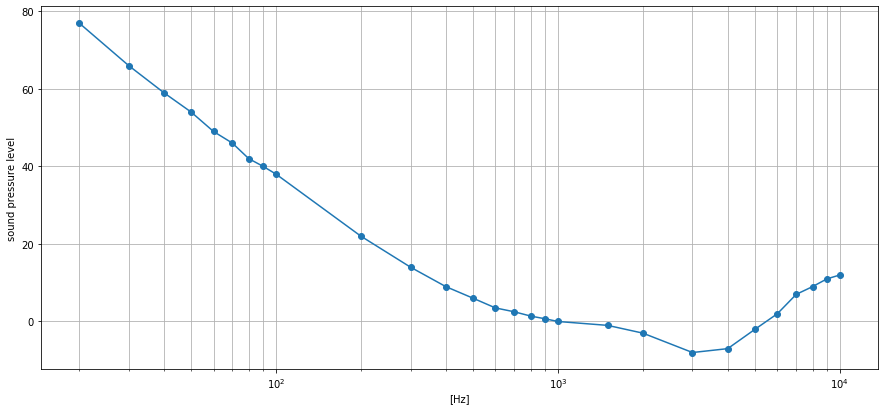

In [15]:
plt.semilogx(hz, spl, 'o-')

plt.grid(which="both")
plt.xlabel('[Hz]')
plt.ylabel('sound pressure level')
plt.show()

This is a good opportunity to introduce also the function **`loglog()`** which plots in logarithmic scale for both x and y.  
In this case, since there are negative y values, it will not plot the negative values.

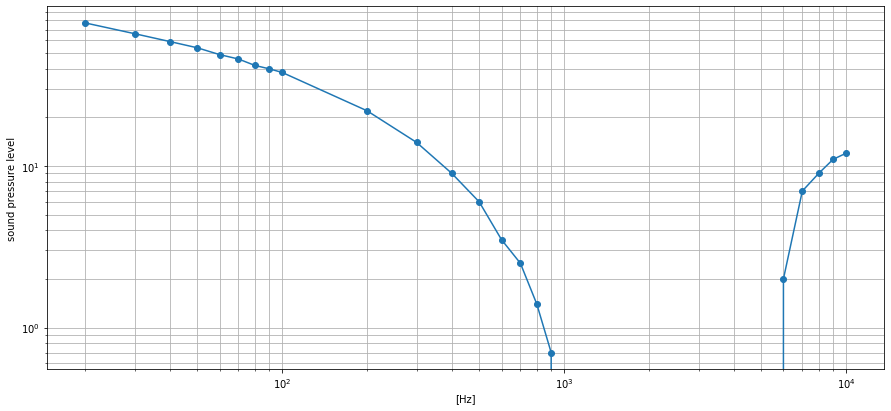

In [16]:
plt.loglog(hz, spl, '-o')


plt.grid(which="both")
plt.xlabel('[Hz]')
plt.ylabel('sound pressure level')
plt.show()

If we want to estimate the value of SPL at the
frequency 2500 Hz, we can interpolate.  
The notation 2.5e3 means 2.5*10^3

In [17]:
spl_linear = interp1d(hz, spl, kind='linear')
x = 2.5e3
print(f'spl({x}) = {spl_linear(x)}')

spl(2500.0) = -5.5


We may believe that *spline* will give a better interpolation.

In [18]:
spl_spline = interp1d(hz, spl, kind='cubic')
print(f'spl({x}) = {spl_spline(x)}')

spl(2500.0) = -5.868997926788573


Let's look more closely at the interval between 2000 Hz and 5000 Hz, 
by interpolating at 100 points between those values.  
Let's compare (visually) linear and spline interpolation.

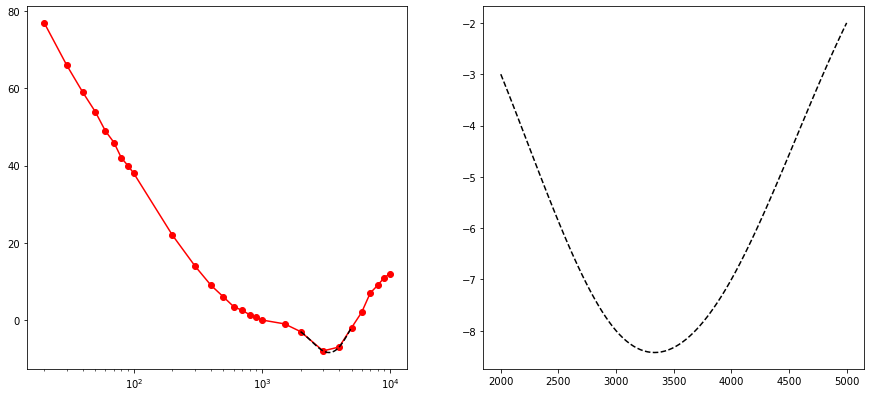

In [19]:
hzi = np.linspace(2000,5000, 100) 
spli = spl_spline(hzi)

fig, axs = plt.subplots(1, 2)
axs[0].semilogx(hz, spl, 'ro-')
axs[0].semilogx(hzi, spli, 'k--')
axs[1].plot(hzi, spli, 'k--')

plt.show()

Now we can estimate where the smallest point is.  
The accuracy of the value we get depends on how much the interpolation is accurate.

In [20]:
np.min(spli)

-8.424551422777906

Usually we think of the function 'min' as such that simply gives us the value of 'y' at the minimum.  
It only goes over the vector it gets as input and 
finds the smallest one (no interpolation). 

In [21]:
spl_min = np.min(spli)
spl_min_idx = np.argmin(spli)

`idx` is not the x (in this case Hzi) value, but the location in the vector (index).

In [22]:
hzi[spl_min_idx]

3333.3333333333335

---
## **Sorting**
 
Sorting is the action of rearranging the numbers in a vector either in ascending or descending order. 

To demonstrate sorting we will use the function `np.random.permutation()`. This function gets as input a natural number.   
It outputs a vector with all the natural numbers up to the input value, at a random order (no number repeats itself!).

In [23]:
x = np.random.permutation(10)
x

array([1, 6, 0, 8, 2, 4, 5, 7, 3, 9])

The function 'sort' simply sorts the input vector in an ascending order.

In [24]:
xs = np.sort(x)
xs

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In order to sort the numbers in descending order we need to flip the array.

In [25]:
xs_rev = xs[: : -1]
xs_rev

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

We can sort a multiple dimentions array by a certain axis

In [32]:
xx = np.random.randint(0, 100, size=(5, 5))
xx

array([[ 3, 94,  1, 88, 22],
       [82, 29, 18, 54,  2],
       [73, 86, 98, 56,  5],
       [92, 46, 89, 66,  3],
       [ 4,  1, 36, 95,  6]])

In [33]:
xx.sort(axis=1) #sort each line separately
xx

array([[ 1,  3, 22, 88, 94],
       [ 2, 18, 29, 54, 82],
       [ 5, 56, 73, 86, 98],
       [ 3, 46, 66, 89, 92],
       [ 1,  4,  6, 36, 95]])

We can also sort a Data frame

In [26]:
peaks_df = pd.read_csv("files/14er.csv", encoding='ISO-8859-1').set_index("ID")
peaks_df.head(10)

,Mountain Peak,Mountain Range,Elevation_ft,fourteener,Prominence_ft,Isolation_mi,Lat,Long,Standard Route,Distance_mi,Elevation Gain_ft,Difficulty,Traffic Low,Traffic High,photo
ID,,,,,,,,,,,,,,,
1,Mount Elbert,Sawatch Range,14440,Y,9093,670.00,39.1178,-106.4454,Northeast Ridge,9.50,4700,Class 1,20000,25000,https://www.14ers.com/photos/mtelbert/peakphot...
2,Mount Massive,Sawatch Range,14428,Y,1961,5.06,39.1875,-106.4757,East Slopes,14.50,4500,Class 2,7000,10000,https://www.14ers.com/photos/mtmassive/peakpho...
3,Mount Harvard,Sawatch Range,14421,Y,2360,14.93,38.9244,-106.3207,South Slopes,14.00,4600,Class 2,5000,7000,https://www.14ers.com/photos/harvardgroup/peak...
4,Blanca Peak,Sangre de Cristo Range,14351,Y,5326,103.40,37.5775,-105.4856,Northwest Ridge,17.00,6500,Hard Class 2,1000,3000,https://www.14ers.com/photos/blancagroup/peakp...
5,La Plata Peak,Sawatch Range,14343,Y,1836,6.28,39.0294,-106.4729,Northwest Ridge,9.25,4500,Class 2,5000,7000,https://www.14ers.com/photos/laplatapeak/peakp...
6,Uncompahgre Peak,San Juan Mountains,14321,Y,4277,85.10,38.0717,-107.4621,South Ridge,7.50,3000,Class 2,3000,5000,https://www.14ers.com/photos/uncompahgrepeak/p...
7,Crestone Peak,Sangre de Cristo Range,14300,Y,4554,27.40,37.9669,-105.5855,South Face,14.00,5700,Class 3,1000,3000,https://www.14ers.com/photos/crestonegroup/pea...
8,Mount Lincoln,Mosquito Range,14293,Y,3862,22.60,39.3515,-106.1116,West Ridge,6.00,2600,Class 2,15000,20000,https://www.14ers.com/photos/lincolngroup/peak...
9,Castle Peak,Elk Mountains,14279,Y,2365,20.90,39.0097,-106.8614,Northeast Ridge,13.50,4600,Hard Class 2,1000,3000,https://www.14ers.com/photos/castlegroup/peakp...


We can choose by witch column to sort.  
Let sort the peaks bt the busiest peaks from the most to least (decending order).

In [27]:
peaks_df.sort_values(["Traffic High"], ascending=False).head(10)

,Mountain Peak,Mountain Range,Elevation_ft,fourteener,Prominence_ft,Isolation_mi,Lat,Long,Standard Route,Distance_mi,Elevation Gain_ft,Difficulty,Traffic Low,Traffic High,photo
ID,,,,,,,,,,,,,,,
38,Mount Bierstadt,Front Range,14065,Y,720,1.12,39.582600,-105.668800,West Slopes,7.00,2850,Class 2,35000,40000,https://www.14ers.com/photos/evansgroup/peakph...
12,Torreys Peak,Front Range,14275,Y,560,0.65,39.642800,-105.821200,South Slopes,8.00,3000,Class 2,25000,30000,https://www.14ers.com/photos/graystorreys/peak...
10,Grays Peak,Front Range,14278,Y,2770,25.00,39.633900,-105.817600,North Slopes,8.00,3000,Class 1,25000,30000,https://www.14ers.com/photos/graystorreys/peak...
1,Mount Elbert,Sawatch Range,14440,Y,9093,670.00,39.117800,-106.445400,Northeast Ridge,9.50,4700,Class 1,20000,25000,https://www.14ers.com/photos/mtelbert/peakphot...
45,Mount Sherman,Mosquito Range,14043,Y,850,8.06,39.225000,-106.169900,Southwest Ridge,5.25,2100,Class 2,20000,25000,https://www.14ers.com/photos/mtsherman/peakpho...
13,Quandary Peak,Mosquito Range,14271,Y,1125,3.16,39.397300,-106.106400,East Ridge,6.75,3450,Class 1,20000,25000,https://www.14ers.com/photos/quandarypeak/peak...
54,Mt. Cameron,Mosquito Range,14238,N,158,0.48,39.347165,-106.118501,West Ridge,4.75,2250,Class 2,15000,20000,https://www.14ers.com/photos/lincolngroup/peak...
28,Mount Democrat,Mosquito Range,14155,Y,768,1.27,39.339600,-106.140000,East Slope,4.00,2150,Class 2,15000,20000,https://www.14ers.com/photos/lincolngroup/peak...
22,Mount Bross,Mosquito Range,14178,Y,312,0.99,39.335400,-106.107700,West Slopes,3.25,2250,Class 2,15000,20000,https://www.14ers.com/photos/lincolngroup/peak...


We can also sort by multiple columns.

In [21]:
peaks_df.sort_values(["Mountain Range", "Distance_mi"]).head(10)

,ID,Mountain Peak,Mountain Range,Elevation_ft,fourteener,Prominence_ft,Isolation_mi,Lat,Long,Standard Route,Distance_mi,Elevation Gain_ft,Difficulty,Traffic Low,Traffic High,photo
46,47,Pyramid Peak,Elk Mountains,14025,Y,1638,2.09,39.071700,-106.950200,Northeast Ridge,8.25,4500,Class 4,1000,3000,https://www.14ers.com/photos/maroongroup/peakp...
57,58,North Maroon Peak,Elk Mountains,14014,N,254,0.37,39.076007,-106.987058,Northeast Ridge,9.25,4500,Class 4,1000,3000,https://www.14ers.com/photos/maroongroup/peakp...
23,24,Maroon Peak,Elk Mountains,14163,Y,2336,8.06,39.070800,-106.989000,South ridge,11.50,4800,Class 3,1000,3000,https://www.14ers.com/photos/maroongroup/peakp...
8,9,Castle Peak,Elk Mountains,14279,Y,2365,20.90,39.009700,-106.861400,Northeast Ridge,13.50,4600,Hard Class 2,1000,3000,https://www.14ers.com/photos/castlegroup/peakp...
55,56,Conundrum Peak,Elk Mountains,14060,N,280,0.40,39.015682,-106.862749,Via Castle Peak,14.50,4850,Hard Class 2,1000,3000,https://www.14ers.com/photos/castlegroup/peakp...
28,29,Capitol Peak,Elk Mountains,14137,Y,1750,7.44,39.150300,-107.082900,Northeast Ridge,17.00,5300,Class 4,1000,3000,https://www.14ers.com/photos/capitolpeak/peakp...
30,31,Snowmass Mountain,Elk Mountains,14099,Y,1152,2.34,39.118800,-107.066500,East Slopes,22.00,5800,Hard Class 3,1000,3000,https://www.14ers.com/photos/snowmassmtn/peakp...
13,14,Mount Evans,Front Range,14271,Y,2770,9.79,39.588300,-105.643800,West Ridge via Mount Spalding,5.00,2000,Class 2,15000,20000,https://www.14ers.com/photos/evansgroup/peakph...
37,38,Mount Bierstadt,Front Range,14065,Y,720,1.12,39.582600,-105.668800,West Slopes,7.00,2850,Class 2,35000,40000,https://www.14ers.com/photos/evansgroup/peakph...
9,10,Grays Peak,Front Range,14278,Y,2770,25.00,39.633900,-105.817600,North Slopes,8.00,3000,Class 1,25000,30000,https://www.14ers.com/photos/graystorreys/peak...
